In [1]:
%pip install nltk
%pip install pandas # pandas 설치
%pip install matplotlib # 시각화 목적 matplotlib 설치
%pip install seaborn

import nltk as nltk
nltk.download('vader_lexicon') # VADER 감정 분석기에 필요한 어휘 자료를 다운로드
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import time
import pandas as pd
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer # nltk의 VADER 감정 분석기를 가져옮
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import time
import warnings

warnings.filterwarnings('ignore')

In [3]:
from pandas import *

row_data = read_csv("./amazon_uk_shoes_products_dataset_2021_12.csv")

row_data.head()

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25


In [4]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                6823 non-null   object 
 1   product_name       6823 non-null   object 
 2   reviewer_name      6823 non-null   object 
 3   review_title       6822 non-null   object 
 4   review_text        6814 non-null   object 
 5   review_rating      6823 non-null   float64
 6   verified_purchase  6823 non-null   bool   
 7   review_date        6823 non-null   object 
 8   helpful_count      1953 non-null   object 
 9   uniq_id            6823 non-null   object 
 10  scraped_at         6823 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 539.8+ KB


In [5]:
print("url : ", row_data.iloc[0, 0])
print("product_name : ", row_data.iloc[0, 1])
print("reviewer_name : ", row_data.iloc[0, 2])
print("review_title : ", row_data.iloc[0, 3])
print("review_text : ", row_data.iloc[0, 4])
print("review_rating : ", row_data.iloc[0, 5])
print("verified_purchase : ", row_data.iloc[0, 6])
print("review_date : ", row_data.iloc[0, 7])
print("helpful_count : ", row_data.iloc[0, 8])
print("uniq_id : ", row_data.iloc[0, 9])
print("scraped_at : ", row_data.iloc[0, 10])

url :  https://www.amazon.co.uk/dp/B07SBX32T5
product_name :  Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK
reviewer_name :  Jocelyn McSayles
review_title :  Love em
review_text :  Love these. Was looking for converses and these were half the price and so unique— I’ve never seen clear shoes like these; they fit great. The plastic takes a little getting used to but the style is so worth it.
review_rating :  5.0
verified_purchase :  True
review_date :  Reviewed in the United States on 2 June 2020
helpful_count :  2 people found this helpful
uniq_id :  36eae4e5-2894-5279-a0b7-d2b330e2b814
scraped_at :  24/12/2021 02:26:25


1. 상품 링크
2. 상품 이름
3. 리뷰작성자 이름
4. 리뷰 제목
5. 리뷰 내용
6. 리뷰 별점 값
7. 구매 여부
8. 리뷰 작성일
9. 리뷰 아이디
10. 리뷰 스크랩 날짜

In [6]:
print("url : ", row_data.iloc[0, 0])
print("product_name : ", row_data.iloc[0, 1])
print("reviewer_name : ", row_data.iloc[0, 2])
print("review_title : ", row_data.iloc[0, 3])
print("review_text : ", row_data.iloc[0, 4])
print("review_rating : ", row_data.iloc[0, 5])
print("verified_purchase : ", row_data.iloc[0, 6])
print("review_date : ", row_data.iloc[0, 7])
print("helpful_count : ", row_data.iloc[0, 8])
print("uniq_id : ", row_data.iloc[0, 9])
print("scraped_at : ", row_data.iloc[0, 10])

url :  https://www.amazon.co.uk/dp/B07SBX32T5
product_name :  Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK
reviewer_name :  Jocelyn McSayles
review_title :  Love em
review_text :  Love these. Was looking for converses and these were half the price and so unique— I’ve never seen clear shoes like these; they fit great. The plastic takes a little getting used to but the style is so worth it.
review_rating :  5.0
verified_purchase :  True
review_date :  Reviewed in the United States on 2 June 2020
helpful_count :  2 people found this helpful
uniq_id :  36eae4e5-2894-5279-a0b7-d2b330e2b814
scraped_at :  24/12/2021 02:26:25


In [7]:
#사용할 columns 고르기
df = row_data[['review_title', 'review_text', 'review_rating', 'verified_purchase', 'uniq_id']]

df

,review_title,review_text,review_rating,verified_purchase,uniq_id
0,Love em,Love these. Was looking for converses and thes...,5.0,True,36eae4e5-2894-5279-a0b7-d2b330e2b814
1,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,f4778bb8-3070-5cb1-b5aa-ffce41a97b57
2,Good quality,Good quality,5.0,True,db5a7525-d40b-5265-84d8-df4f29837a3b
3,Good,Great,5.0,True,75a42851-6462-54b5-988a-27d336221943
4,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,232dee43-849e-5d06-ba05-efb3f4814714
...,...,...,...,...,...
6818,Schick und leicht,"Schicker Schuh, läuft sich gut.",5.0,True,0850eae1-fa2f-59e6-bf30-ad49151bfa20
6819,EXCELLENT,Mieux que je ne l'imaginais. Très bonne taille...,5.0,True,4bf117ed-ea7c-517c-967c-2aee3f80ed29
6820,Einfach schöne Hausschuhe,Habe sie als Geschenk gekauft und sie sind seh...,5.0,True,5b129eb2-a438-5377-9c46-217a177615b2
6821,Langlebig.,Trage diese Hausschuhe fast zwei Monate jeden ...,5.0,True,91144305-98db-5a55-8ec4-16a253beb811


In [8]:
#전체 데이터 개수 확인
print("리뷰 개수 :", len(df['uniq_id']))

#중복 개수 확인
print("중복 데이터 개수 :", df['uniq_id'].duplicated(keep = False).sum())

리뷰 개수 : 6823
중복 데이터 개수 : 364


In [9]:
#중복 데이터 확인
df[df['uniq_id'].duplicated(keep = False) == True]

,review_title,review_text,review_rating,verified_purchase,uniq_id
598,Perfecto. Muy bonito,Muy bonito. Muy cómodo. Muy bueno,5.0,True,f5f75b0d-810d-5793-b5bf-b95a8e0cb940
599,Muy bonitas y elegantes.,Muy bonitas y elegantes. Muy buenos materiales...,5.0,True,c6e3c445-a2ff-5983-ad98-e65e9a95dba9
600,Chaussures élégantes et très confortables.,"Très belles chaussures, très confortables, poi...",5.0,True,60e77059-0736-51b4-af29-3bd66f0eea2e
735,Don't waste your money,See DanGeorge review it is accurate .... plus ...,1.0,True,ca8d6366-b2a1-5dba-8193-811cbc70306e
736,Very Poor Quality - Possibly fake Reeboks,"Bought these in January, in April, the leather...",1.0,True,a7a761b9-a137-5dad-abca-ce0527001727
...,...,...,...,...,...
6808,They look great but...,Fits bigger than the other 4 pairs of Adidas m...,3.0,True,3092d09f-9f6e-51fd-a828-97b58d59de9c
6809,Awe,Super comfortable kicks and they look Awesome.,5.0,True,3b899dc2-f509-53ed-9801-8f8f41075b00
6810,"Comfortable, like walking on a cloud.","There are no dislikes, every step is with cush...",5.0,True,9eb0cc48-0aa1-536c-9ea4-d4df3a8ed326
6811,These shoes are the bomb,I never had shoes this comfy. Definitely buy a...,5.0,True,0f1f0492-1e18-5c7e-ad1e-066135767977


In [10]:
#중복 케이스 확인
df[ df['uniq_id'] == 'f5f75b0d-810d-5793-b5bf-b95a8e0cb940' ]

,review_title,review_text,review_rating,verified_purchase,uniq_id
598,Perfecto. Muy bonito,Muy bonito. Muy cómodo. Muy bueno,5.0,True,f5f75b0d-810d-5793-b5bf-b95a8e0cb940
4518,Perfecto. Muy bonito,Muy bonito. Muy cómodo. Muy bueno,5.0,True,f5f75b0d-810d-5793-b5bf-b95a8e0cb940


In [11]:
#중복 데이터 제거
clean_data = df.drop_duplicates(subset=['uniq_id'], keep='first')

In [12]:
#중복 제거 후 데이터 개수
print("중복 제거 후 리뷰 개수 :", len(clean_data['uniq_id']))

중복 제거 후 리뷰 개수 : 6641


In [13]:
#중복값 제거 확인
clean_data[clean_data['uniq_id'].duplicated(keep = False) == True]

,review_title,review_text,review_rating,verified_purchase,uniq_id


In [14]:
#각 열의 null 개수 확인
clean_data.isnull().sum()

review_title         1
review_text          8
review_rating        0
verified_purchase    0
uniq_id              0
dtype: int64

In [15]:
#review_title이 비어 있는 행 확인
clean_data[ clean_data['review_title'].isnull() == True ]

,review_title,review_text,review_rating,verified_purchase,uniq_id
3467,NaN,My son is very happy with his new pair of cham...,5.0,True,f5580b8b-86be-50b9-8fbe-0b69b669b148


In [16]:
#review_title 결측값 채우기
clean_data['review_title'] = clean_data['review_title'].fillna("")

In [17]:
#결측값 재확인
clean_data.isnull().sum()

review_title         0
review_text          8
review_rating        0
verified_purchase    0
uniq_id              0
dtype: int64

In [18]:
#review_text가 null인 행 확인
clean_data[ clean_data['review_text'].isnull() == True ]

,review_title,review_text,review_rating,verified_purchase,uniq_id
309,Viene defectuoso,NaN,1.0,True,d916809a-6824-501f-b935-c5f7849d336a
351,Muy buen producto,NaN,5.0,True,9621238f-c299-5049-9f4b-43fde1f94dbb
944,No me agrado la pieza plastica del final,NaN,3.0,True,d27bdd6c-3841-50cf-ae30-b13d86bb95f2
1698,Good sneakers,NaN,5.0,True,44a4f526-8486-5616-a1ff-245da2d674ac
3402,Me entregaron un producto distinto al que habí...,NaN,1.0,True,9f0591c4-3f59-59f4-872e-8a03124df6b3
4594,Wspaniały,NaN,5.0,True,c7a68647-8f3f-549d-aed9-92061757e71d
5278,Très mauvais produits chaussure ont changé la ...,NaN,1.0,True,19aea8ae-da4d-539c-b7e1-a309aac97cf7
5984,Scarpe perfette comodissime e leggere... Spedi...,NaN,5.0,True,542154e1-3799-5f2b-bf4b-7f9359a7cf76


In [19]:
#review_text가 결측값 채우기
clean_data['review_text'] = clean_data['review_text'].fillna("")

In [20]:
#결측값 재확인
clean_data.isnull().sum()

review_title         0
review_text          0
review_rating        0
verified_purchase    0
uniq_id              0
dtype: int64

In [21]:
#노이즈(특수문자) 제거
def remove(text):
    clean = re.sub(r'[^A-Za-z\s]', '', text)
    return clean

clean_data['review_title'] = clean_data['review_title'].apply(remove)
clean_data['review_text'] = clean_data['review_text'].apply(remove)

In [22]:
clean_data

,review_title,review_text,review_rating,verified_purchase,uniq_id
0,Love em,Love these Was looking for converses and these...,5.0,True,36eae4e5-2894-5279-a0b7-d2b330e2b814
1,The plastic ripped,The shoes are very cute but after the nd day o...,2.0,True,f4778bb8-3070-5cb1-b5aa-ffce41a97b57
2,Good quality,Good quality,5.0,True,db5a7525-d40b-5265-84d8-df4f29837a3b
3,Good,Great,5.0,True,75a42851-6462-54b5-988a-27d336221943
4,PERFETTE,Ho scelto il modello bianco con rifinitura die...,5.0,True,232dee43-849e-5d06-ba05-efb3f4814714
...,...,...,...,...,...
6818,Schick und leicht,Schicker Schuh luft sich gut,5.0,True,0850eae1-fa2f-59e6-bf30-ad49151bfa20
6819,EXCELLENT,Mieux que je ne limaginais Trs bonne taille Bo...,5.0,True,4bf117ed-ea7c-517c-967c-2aee3f80ed29
6820,Einfach schne Hausschuhe,Habe sie als Geschenk gekauft und sie sind seh...,5.0,True,5b129eb2-a438-5377-9c46-217a177615b2
6821,Langlebig,Trage diese Hausschuhe fast zwei Monate jeden ...,5.0,True,91144305-98db-5a55-8ec4-16a253beb811


In [23]:
#토큰화
def token(text):
    tokens = word_tokenize(text)
    return tokens

clean_data['review_title'] = clean_data['review_title'].apply(token)
clean_data['review_text'] = clean_data['review_text'].apply(token)


In [24]:
clean_data

,review_title,review_text,review_rating,verified_purchase,uniq_id
0,"[Love, em]","[Love, these, Was, looking, for, converses, an...",5.0,True,36eae4e5-2894-5279-a0b7-d2b330e2b814
1,"[The, plastic, ripped]","[The, shoes, are, very, cute, but, after, the,...",2.0,True,f4778bb8-3070-5cb1-b5aa-ffce41a97b57
2,"[Good, quality]","[Good, quality]",5.0,True,db5a7525-d40b-5265-84d8-df4f29837a3b
3,[Good],[Great],5.0,True,75a42851-6462-54b5-988a-27d336221943
4,[PERFETTE],"[Ho, scelto, il, modello, bianco, con, rifinit...",5.0,True,232dee43-849e-5d06-ba05-efb3f4814714
...,...,...,...,...,...
6818,"[Schick, und, leicht]","[Schicker, Schuh, luft, sich, gut]",5.0,True,0850eae1-fa2f-59e6-bf30-ad49151bfa20
6819,[EXCELLENT],"[Mieux, que, je, ne, limaginais, Trs, bonne, t...",5.0,True,4bf117ed-ea7c-517c-967c-2aee3f80ed29
6820,"[Einfach, schne, Hausschuhe]","[Habe, sie, als, Geschenk, gekauft, und, sie, ...",5.0,True,5b129eb2-a438-5377-9c46-217a177615b2
6821,[Langlebig],"[Trage, diese, Hausschuhe, fast, zwei, Monate,...",5.0,True,91144305-98db-5a55-8ec4-16a253beb811


In [25]:
#불용어 제거
def stop(text):
    stopword = [word for word in text if word not in stopwords.words("english")]
    return stopword

clean_data['review_title'] = clean_data['review_title'].apply(stop)
clean_data['review_text'] = clean_data['review_text'].apply(stop)

In [26]:
clean_data

,review_title,review_text,review_rating,verified_purchase,uniq_id
0,"[Love, em]","[Love, Was, looking, converses, half, price, u...",5.0,True,36eae4e5-2894-5279-a0b7-d2b330e2b814
1,"[The, plastic, ripped]","[The, shoes, cute, nd, day, wearing, tongue, s...",2.0,True,f4778bb8-3070-5cb1-b5aa-ffce41a97b57
2,"[Good, quality]","[Good, quality]",5.0,True,db5a7525-d40b-5265-84d8-df4f29837a3b
3,[Good],[Great],5.0,True,75a42851-6462-54b5-988a-27d336221943
4,[PERFETTE],"[Ho, scelto, il, modello, bianco, con, rifinit...",5.0,True,232dee43-849e-5d06-ba05-efb3f4814714
...,...,...,...,...,...
6818,"[Schick, und, leicht]","[Schicker, Schuh, luft, sich, gut]",5.0,True,0850eae1-fa2f-59e6-bf30-ad49151bfa20
6819,[EXCELLENT],"[Mieux, que, je, ne, limaginais, Trs, bonne, t...",5.0,True,4bf117ed-ea7c-517c-967c-2aee3f80ed29
6820,"[Einfach, schne, Hausschuhe]","[Habe, sie, als, Geschenk, gekauft, und, sie, ...",5.0,True,5b129eb2-a438-5377-9c46-217a177615b2
6821,[Langlebig],"[Trage, diese, Hausschuhe, fast, zwei, Monate,...",5.0,True,91144305-98db-5a55-8ec4-16a253beb811


In [27]:
#정규화
def lemmatize_and_stem(tokens):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    
    #표제어 추출
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    #스테밍
    stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens]
    
    return ' '.join(stemmed_tokens)

clean_data['review_title'] = clean_data['review_title'].apply(lemmatize_and_stem)
clean_data['review_text'] = clean_data['review_text'].apply(lemmatize_and_stem)

In [28]:
clean_data

,review_title,review_text,review_rating,verified_purchase,uniq_id
0,love em,love wa look convers half price uniqu ive neve...,5.0,True,36eae4e5-2894-5279-a0b7-d2b330e2b814
1,the plastic rip,the shoe cute nd day wear tongu start rip afte...,2.0,True,f4778bb8-3070-5cb1-b5aa-ffce41a97b57
2,good qualiti,good qualiti,5.0,True,db5a7525-d40b-5265-84d8-df4f29837a3b
3,good,great,5.0,True,75a42851-6462-54b5-988a-27d336221943
4,perfett,ho scelto il modello bianco con rifinitura die...,5.0,True,232dee43-849e-5d06-ba05-efb3f4814714
...,...,...,...,...,...
6818,schick und leicht,schicker schuh luft sich gut,5.0,True,0850eae1-fa2f-59e6-bf30-ad49151bfa20
6819,excel,mieux que je ne limaginai tr bonn taill bonn l...,5.0,True,4bf117ed-ea7c-517c-967c-2aee3f80ed29
6820,einfach schne hausschuh,habe sie al geschenk gekauft und sie sind sehr...,5.0,True,5b129eb2-a438-5377-9c46-217a177615b2
6821,langlebig,trage dies hausschuh fast zwei monat jeden tag...,5.0,True,91144305-98db-5a55-8ec4-16a253beb811


In [29]:
vader_sentiment = SentimentIntensityAnalyzer() # VADER 감정 분석기를 초기화

def calc_sentiment(review):    
    return vader_sentiment.polarity_scores(review)["compound"]

In [30]:
# 감정 계산 시작
print("감정 계산 시작")
start = time.time()

# VADER를 사용하여 감성 점수 계산
clean_data["new_title"] = clean_data.review_title.apply(calc_sentiment)
clean_data["new_text"] = clean_data.review_text.apply(calc_sentiment)

end = time.time()
print("감정 계산 끝 " + str(round(end - start, 2)) + " 초 동안 진행")

감정 계산 시작
감정 계산 끝 1.91 초 동안 진행


In [31]:
clean_data

,review_title,review_text,review_rating,verified_purchase,uniq_id,new_title,new_text
0,love em,love wa look convers half price uniqu ive neve...,5.0,True,36eae4e5-2894-5279-a0b7-d2b330e2b814,0.6369,0.9188
1,the plastic rip,the shoe cute nd day wear tongu start rip afte...,2.0,True,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,0.0000,0.2240
2,good qualiti,good qualiti,5.0,True,db5a7525-d40b-5265-84d8-df4f29837a3b,0.4404,0.4404
3,good,great,5.0,True,75a42851-6462-54b5-988a-27d336221943,0.4404,0.6249
4,perfett,ho scelto il modello bianco con rifinitura die...,5.0,True,232dee43-849e-5d06-ba05-efb3f4814714,0.0000,-0.4588
...,...,...,...,...,...,...,...
6818,schick und leicht,schicker schuh luft sich gut,5.0,True,0850eae1-fa2f-59e6-bf30-ad49151bfa20,0.0000,0.0000
6819,excel,mieux que je ne limaginai tr bonn taill bonn l...,5.0,True,4bf117ed-ea7c-517c-967c-2aee3f80ed29,0.4588,0.0000
6820,einfach schne hausschuh,habe sie al geschenk gekauft und sie sind sehr...,5.0,True,5b129eb2-a438-5377-9c46-217a177615b2,0.0000,0.5994
6821,langlebig,trage dies hausschuh fast zwei monat jeden tag...,5.0,True,91144305-98db-5a55-8ec4-16a253beb811,0.0000,-0.8807


In [32]:
#감정 계산 결과를 0과 1로 변경
#1이 긍정, 0이 부정
def new_label_data(data):
    if data >= 0.1:
        return 1
    else:
        return 0

clean_data["new_title_data"] = clean_data.new_title.apply(new_label_data) 
clean_data["new_text_data"] = clean_data.new_text.apply(new_label_data)

In [33]:
clean_data

,review_title,review_text,review_rating,verified_purchase,uniq_id,new_title,new_text,new_title_data,new_text_data
0,love em,love wa look convers half price uniqu ive neve...,5.0,True,36eae4e5-2894-5279-a0b7-d2b330e2b814,0.6369,0.9188,1,1
1,the plastic rip,the shoe cute nd day wear tongu start rip afte...,2.0,True,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,0.0000,0.2240,0,1
2,good qualiti,good qualiti,5.0,True,db5a7525-d40b-5265-84d8-df4f29837a3b,0.4404,0.4404,1,1
3,good,great,5.0,True,75a42851-6462-54b5-988a-27d336221943,0.4404,0.6249,1,1
4,perfett,ho scelto il modello bianco con rifinitura die...,5.0,True,232dee43-849e-5d06-ba05-efb3f4814714,0.0000,-0.4588,0,0
...,...,...,...,...,...,...,...,...,...
6818,schick und leicht,schicker schuh luft sich gut,5.0,True,0850eae1-fa2f-59e6-bf30-ad49151bfa20,0.0000,0.0000,0,0
6819,excel,mieux que je ne limaginai tr bonn taill bonn l...,5.0,True,4bf117ed-ea7c-517c-967c-2aee3f80ed29,0.4588,0.0000,1,0
6820,einfach schne hausschuh,habe sie al geschenk gekauft und sie sind sehr...,5.0,True,5b129eb2-a438-5377-9c46-217a177615b2,0.0000,0.5994,0,1
6821,langlebig,trage dies hausschuh fast zwei monat jeden tag...,5.0,True,91144305-98db-5a55-8ec4-16a253beb811,0.0000,-0.8807,0,0


In [34]:
#타이틀, text 합친 후 최종 결과 도출
#1이 긍정, 0이 부정
#2면 긍정-긍정, 1이면 긍정-부정, 0이면 부정-부정
#부정이 하나라도 존재 시 부정으로 간주
clean_data["new_avg_data"] = clean_data.apply( lambda row: 1 if (row['new_title_data'] + row['new_text_data']) > 1 else 0, axis = 1 )

clean_data

,review_title,review_text,review_rating,verified_purchase,uniq_id,new_title,new_text,new_title_data,new_text_data,new_avg_data
0,love em,love wa look convers half price uniqu ive neve...,5.0,True,36eae4e5-2894-5279-a0b7-d2b330e2b814,0.6369,0.9188,1,1,1
1,the plastic rip,the shoe cute nd day wear tongu start rip afte...,2.0,True,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,0.0000,0.2240,0,1,0
2,good qualiti,good qualiti,5.0,True,db5a7525-d40b-5265-84d8-df4f29837a3b,0.4404,0.4404,1,1,1
3,good,great,5.0,True,75a42851-6462-54b5-988a-27d336221943,0.4404,0.6249,1,1,1
4,perfett,ho scelto il modello bianco con rifinitura die...,5.0,True,232dee43-849e-5d06-ba05-efb3f4814714,0.0000,-0.4588,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6818,schick und leicht,schicker schuh luft sich gut,5.0,True,0850eae1-fa2f-59e6-bf30-ad49151bfa20,0.0000,0.0000,0,0,0
6819,excel,mieux que je ne limaginai tr bonn taill bonn l...,5.0,True,4bf117ed-ea7c-517c-967c-2aee3f80ed29,0.4588,0.0000,1,0,0
6820,einfach schne hausschuh,habe sie al geschenk gekauft und sie sind sehr...,5.0,True,5b129eb2-a438-5377-9c46-217a177615b2,0.0000,0.5994,0,1,0
6821,langlebig,trage dies hausschuh fast zwei monat jeden tag...,5.0,True,91144305-98db-5a55-8ec4-16a253beb811,0.0000,-0.8807,0,0,0


In [35]:
clean_data

,review_title,review_text,review_rating,verified_purchase,uniq_id,new_title,new_text,new_title_data,new_text_data,new_avg_data
0,love em,love wa look convers half price uniqu ive neve...,5.0,True,36eae4e5-2894-5279-a0b7-d2b330e2b814,0.6369,0.9188,1,1,1
1,the plastic rip,the shoe cute nd day wear tongu start rip afte...,2.0,True,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,0.0000,0.2240,0,1,0
2,good qualiti,good qualiti,5.0,True,db5a7525-d40b-5265-84d8-df4f29837a3b,0.4404,0.4404,1,1,1
3,good,great,5.0,True,75a42851-6462-54b5-988a-27d336221943,0.4404,0.6249,1,1,1
4,perfett,ho scelto il modello bianco con rifinitura die...,5.0,True,232dee43-849e-5d06-ba05-efb3f4814714,0.0000,-0.4588,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6818,schick und leicht,schicker schuh luft sich gut,5.0,True,0850eae1-fa2f-59e6-bf30-ad49151bfa20,0.0000,0.0000,0,0,0
6819,excel,mieux que je ne limaginai tr bonn taill bonn l...,5.0,True,4bf117ed-ea7c-517c-967c-2aee3f80ed29,0.4588,0.0000,1,0,0
6820,einfach schne hausschuh,habe sie al geschenk gekauft und sie sind sehr...,5.0,True,5b129eb2-a438-5377-9c46-217a177615b2,0.0000,0.5994,0,1,0
6821,langlebig,trage dies hausschuh fast zwei monat jeden tag...,5.0,True,91144305-98db-5a55-8ec4-16a253beb811,0.0000,-0.8807,0,0,0


In [36]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6641 entries, 0 to 6822
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_title       6641 non-null   object 
 1   review_text        6641 non-null   object 
 2   review_rating      6641 non-null   float64
 3   verified_purchase  6641 non-null   bool   
 4   uniq_id            6641 non-null   object 
 5   new_title          6641 non-null   float64
 6   new_text           6641 non-null   float64
 7   new_title_data     6641 non-null   int64  
 8   new_text_data      6641 non-null   int64  
 9   new_avg_data       6641 non-null   int64  
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 525.3+ KB


In [37]:
good = 0
bad = 0

for i in range(len(clean_data)):
    if clean_data.iloc[i, 2] >= 3.0:
        if clean_data.iloc[i, 7] == 1:
            good += 1
        else:
            bad += 1
    else:
        if clean_data.iloc[i, 7] == 1:
            bad += 1
        else:
            good += 1

print("잘 예측 : ", good)
print("잘못 예측 : ", bad)

잘 예측 :  3328
잘못 예측 :  3313


In [38]:
good = 0
bad = 0

for i in range(len(clean_data)):
    if clean_data.iloc[i, 2] >= 3.0:
        if clean_data.iloc[i, 8] == 1:
            good += 1
        else:
            bad += 1
    else:
        if clean_data.iloc[i, 8] == 1:
            bad += 1
        else:
            good += 1

print("잘 예측 : ", good)
print("잘못 예측 : ", bad)

잘 예측 :  4005
잘못 예측 :  2636


In [39]:
good = 0
bad = 0

for i in range(len(clean_data)):
    if clean_data.iloc[i, 2] >= 3.0:
        if clean_data.iloc[i, 9] == 1:
            good += 1
        else:
            bad += 1
    else:
        if clean_data.iloc[i, 9] == 1:
            bad += 1
        else:
            good += 1

print("잘 예측 : ", good)
print("잘못 예측 : ", bad)

잘 예측 :  2928
잘못 예측 :  3713


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# 데이터 지정
y = clean_data["new_avg_data"]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features = 1000) 
X = vectorizer.fit_transform(clean_data['review_text'])

# 학습 데이터와 테스트 데이터로 분할 진행
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

score = grid_search.score(X_test, y_test)
print("Best parameters:", grid_search.best_params_)
print("Test accuracy:", score)

Best parameters: {'C': 1}
Test accuracy: 0.7983446200150489


In [42]:
# 최적의 모델을 사용 데이터 학습 진행
final_model = grid_search.best_estimator_ 
final_model.fit(X_train, y_train) 
y_pred = final_model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

# 정확도 평가
accuracy = round(accuracy_score(y_test, y_pred), 3)
print("Accuracy:", accuracy)

# 정밀도 평가
precision = round(precision_score(y_test, y_pred, average='weighted'), 3)
print("\nPrecision:", precision)

# 재현율 평가
recall = round(recall_score(y_test, y_pred, average='weighted'), 3)
print("\nRecall:", recall)

# F1 점수 평가
f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
print("\nF1 Score:", f1)

# ROC-AUC 점수 계산
roc_auc = round(roc_auc_score(y_test, y_pred), 3)
print("\nROC-AUC Score:", roc_auc)

#Classification report
class_report = classification_report(y_test, y_pred)
print("\n\t\t<Classification Report>\n")
print(class_report)

Accuracy: 0.798

Precision: 0.794

Recall: 0.798

F1 Score: 0.795

ROC-AUC Score: 0.753

		<Classification Report>

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       902
           1       0.71      0.63      0.67       427

    accuracy                           0.80      1329
   macro avg       0.77      0.75      0.76      1329
weighted avg       0.79      0.80      0.79      1329



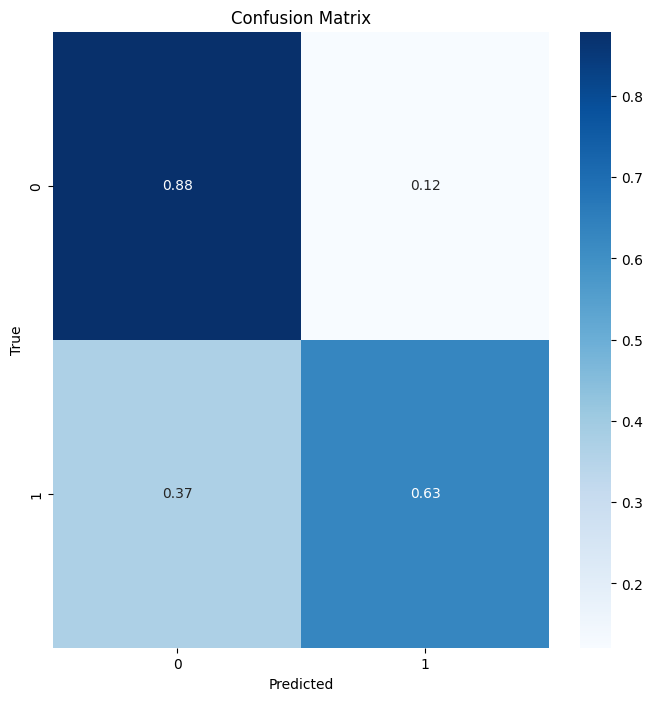

In [44]:
#confusion_matrix로 결과 확인
cm = confusion_matrix(y_test, y_pred, labels = None, sample_weight = None, normalize = 'true')

plt.figure(figsize = (8, 8))
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

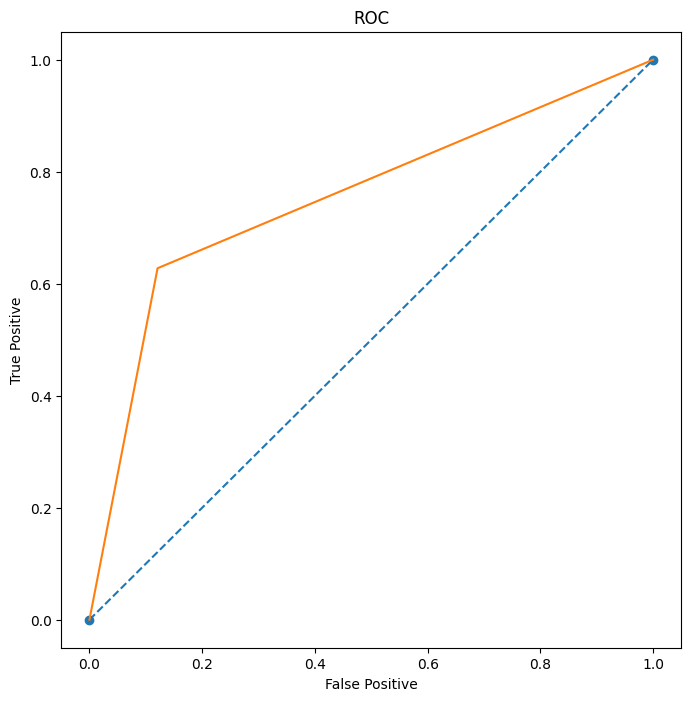

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig = plt.figure(figsize=(8, 8))

plt.plot([0, 1], [0, 1], 'o--')

plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('False Positive')
plt.ylabel('True Positive') 
plt.title('ROC') 
plt.show()